# The Kolmogorov-Smirnov Test - Lab

## Introduction
In the previous lesson, we saw that the Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. In this lab, we shall see how to perform this test in python. 

## Objectives

You will be able to:
* Perform 1 sample and 2 sample KS tests in Python and Scipy
* Compare the KS test to visual approaches for checking normality assumptions
* Plot the CDF and ECDF to visualize parametric and empirical cumulative distribution functions

## Generate Data

### Let's import necessary libraries and generate some data 

In [1]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Create the normal random variables with mean 0, and sd 3
x_10 = stats.norm.rvs(loc=0, scale=3, size=10)
x_50 = stats.norm.rvs(loc=0, scale=3, size=50)
x_100 = stats.norm.rvs(loc=0, scale=3, size=100)
x_1000 = stats.norm.rvs(loc=0, scale=3, size=1000)

### Plot Histograms and QQ plots of above datasets and comment on the output 

- How good are these techniques for checking normality assumptions?
- Compare both these techniques and identify their limitations/benefits etc. 


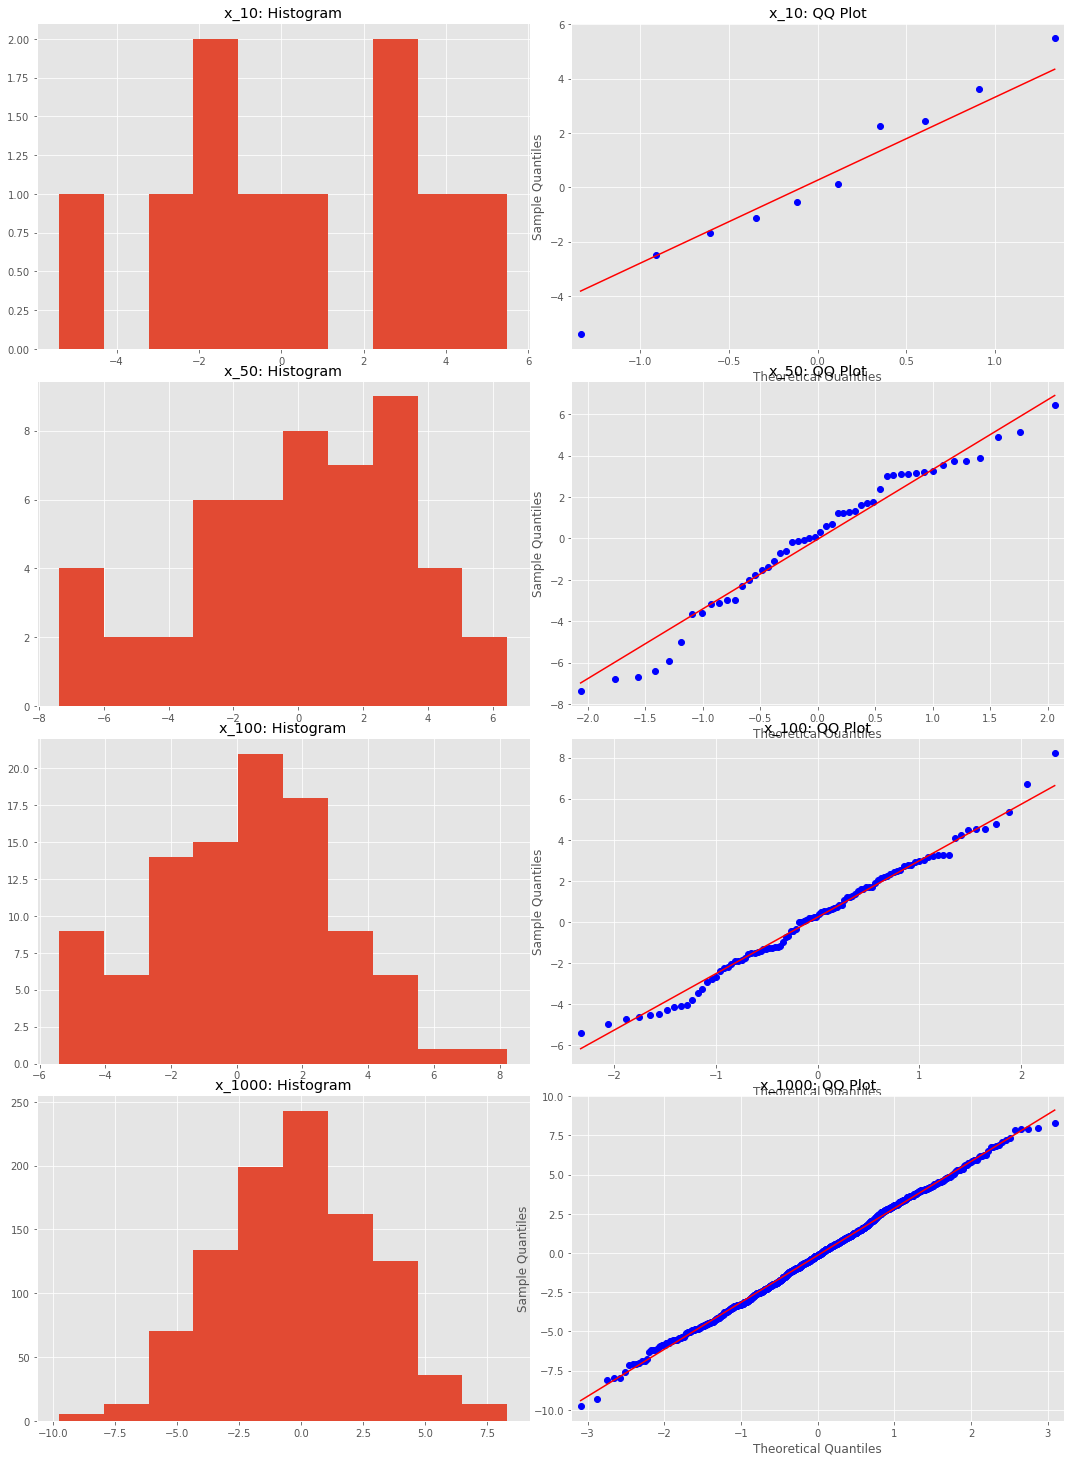

In [25]:
# Plot histograms and QQplots for above datasets
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,20))
plt.tight_layout()

plots = [x_10, x_50, x_100, x_1000]
labels = ['x_10', 'x_50', 'x_100', 'x_1000']

for n, val in enumerate(plots):
    axes[n][0].hist(val)
    axes[n][0].set_title(f"{labels[n]}: Histogram")
    sm.qqplot(val, ax=axes[n][1], line='s')
    axes[n][1].set_title(f"{labels[n]}: QQ Plot")

# You code here

In [ ]:
# You comments here 
# As the sample size increases, the distribution appears more normal

### Creat a function to plot the normal CDF and ECDF for a given dataset
- Create a function ks_plot(data) to generate an empirical CDF from data
- Create a normal CDF using the same mean = 0 and sd = 3 , having the same number of values as data

In [26]:
x_10

array([ 0.11126874, -5.40256557, -1.14673242,  2.45421718,  3.61037809,
       -1.69064604,  5.49022615, -0.52747657,  2.25065196, -2.50736629])

In [27]:
np.sort(x_10)

array([-5.40256557, -2.50736629, -1.69064604, -1.14673242, -0.52747657,
        0.11126874,  2.25065196,  2.45421718,  3.61037809,  5.49022615])

In [40]:
sum(stats.norm.pdf(x_10, loc=0, scale=3))

0.9058563923168179

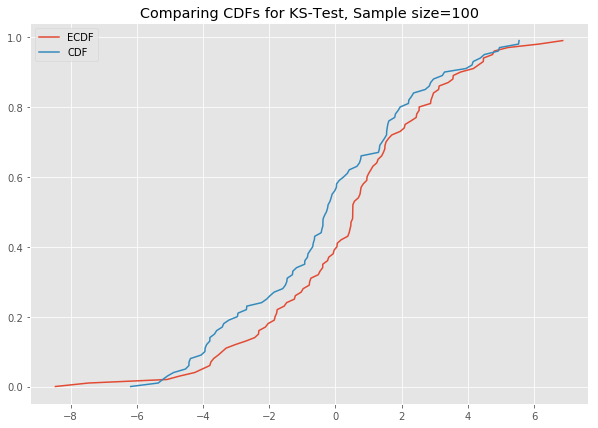

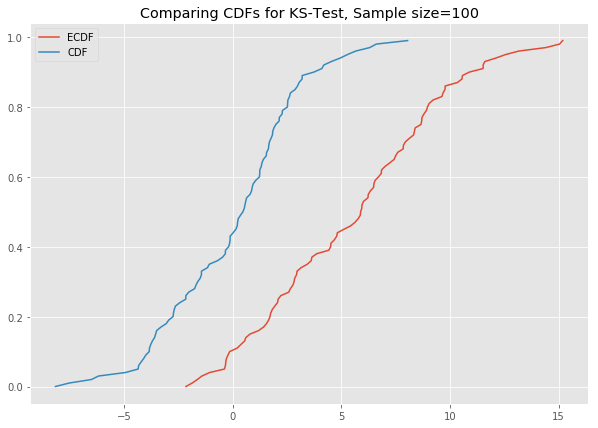

In [42]:
# You code here 

def ks_plot(data):

    plt.figure(figsize=(10, 7))
    plt.plot(np.sort(data), np.linspace(0, 1, len(data), endpoint=False))
    plt.plot(np.sort(stats.norm.rvs(loc=0, scale=3, size=len(data))), np.linspace(0, 1, len(data), endpoint=False))

    plt.legend(['ECDF', 'CDF'])
    plt.title('Comparing CDFs for KS-Test, Sample size=' + str(len(data)))
    

ks_plot(stats.norm.rvs(loc=0, scale=3, size=100)) 
ks_plot(stats.norm.rvs(loc=5, scale=4, size=100))
    
# Uncomment below to run the test
# ks_plot(stats.norm.rvs(loc=0, scale=3, size=100)) 
# ks_plot(stats.norm.rvs(loc=5, scale=4, size=100))


This is awesome. The difference between two cdfs in the second plot show that sample did not come from the distribution which we tried to compare it against. 

### Now you can run all the generated datasets through the function ks_plot and comment on the output.

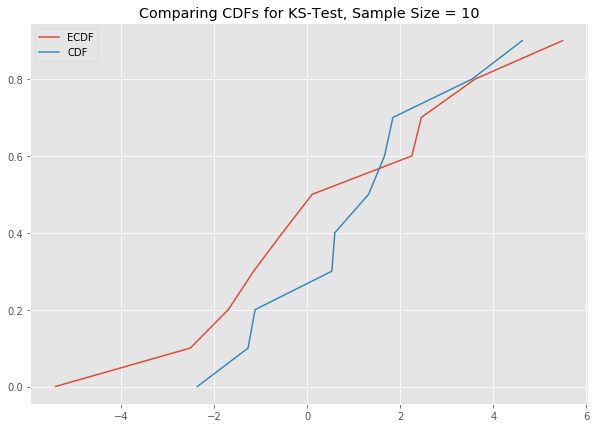

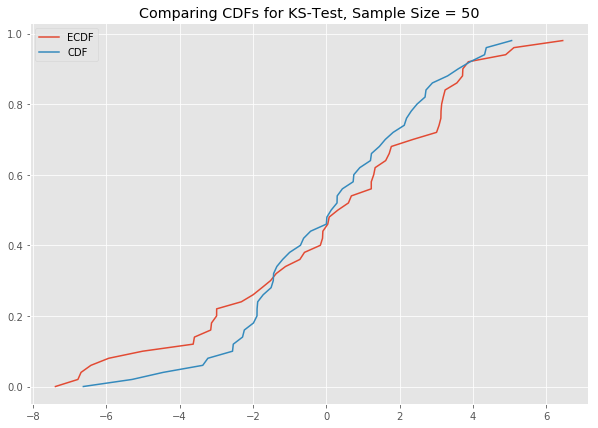

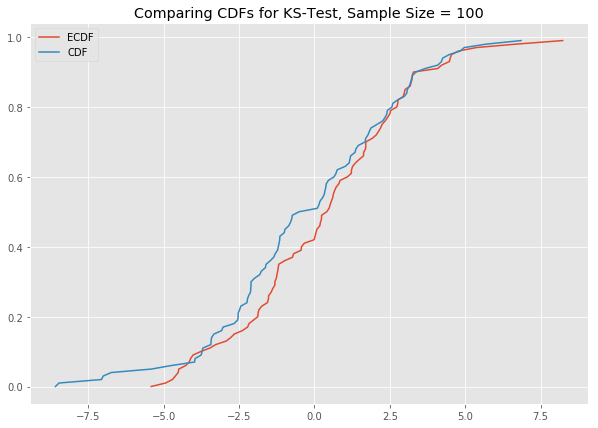

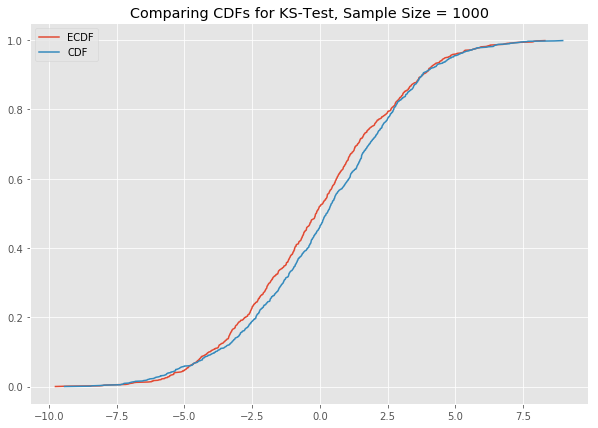

In [47]:
# Your code here 

sample_size = [10, 50, 100, 1000]

for n, val in enumerate(plots):
    ks_plot(val)
    plt.title(f"Comparing CDFs for KS-Test, Sample Size = {sample_size[n]}")
    

In [ ]:
# Your comments here 
# As sample size increases, the experimental distribution moves closer to the comparison distribution.  
# The assumption of normality becomes more reasonable.

### KS test in SciPy

Lets run the Kolmogorov-Smirnov test, and use some statistics to get a final verdict on normality. It lets us test the hypothesis that the sample is a part of the standard t-distribution. In SciPy, we run this test using the method below:

```python
scipy.stats.kstest(rvs, cdf, args=(), N=20, alternative='two-sided', mode='approx')
```
Details on arguments being passed in can be viewed at this [link to official doc.](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html)


### Run the KS test for normality assumption using the datasets created earlier and comment on the output
- Perform the KS test against a normal distribution with mean = 0 and sd = 3
- If p < .05 we can reject the null hypothesis and conclude our sample distribution is not identical to a normal distribution.

In [55]:
# Perform KS test 


for n, val in enumerate(plots):
    print(stats.kstest(val, 'norm', args=(0,3)))

# Your code here 

# KstestResult(statistic=0.1377823669421559, pvalue=0.9913389045954595)
# KstestResult(statistic=0.13970573965633104, pvalue=0.2587483380087914)
# KstestResult(statistic=0.0901015276393986, pvalue=0.37158535281797134)
# KstestResult(statistic=0.030748345486274697, pvalue=0.29574612286614443)

KstestResult(statistic=0.17343808585660947, pvalue=0.9243556544296463)
KstestResult(statistic=0.12219663160878191, pvalue=0.41477762232520676)
KstestResult(statistic=0.07849055087977719, pvalue=0.5541520172777834)
KstestResult(statistic=0.03390002671696418, pvalue=0.1963300375743692)


In [ ]:
# Your comments here 
# No p values are less than 0.05.  Can't reject null hypothessis.


### Generate a uniform distribution and plot / calculate the ks test against a uniform as well as a normal distribution

In [59]:
# Try with a uniform distribution
x_uni = np.random.rand(1000)

print('Normal', stats.kstest(x_uni, 'norm', args=(0,3)))
print('Uniform', stats.kstest(x_uni, 'uniform'))

# KstestResult(statistic=0.023778383763166322, pvalue=0.6239045200710681)
# KstestResult(statistic=0.5000553288071681, pvalue=0.0)

Normal KstestResult(statistic=0.500018723582878, pvalue=1.020013175916199e-231)
Uniform KstestResult(statistic=0.023116690854388056, pvalue=0.659176483122772)


In [ ]:
# Your comments here 
# The hypothesis that the distribution is normal can be rejected, as p value less than 0.05
# The hypothesis that the distribution is unform, cannot be rejected as p value much greater than 0.05

## 2 sample KS test
A two sample KS test is available in SciPy using following function
```python 
scipy.stats.ks_2samp(data1, data2)[source]
```

Let's generate some bi-modal data first for this test 

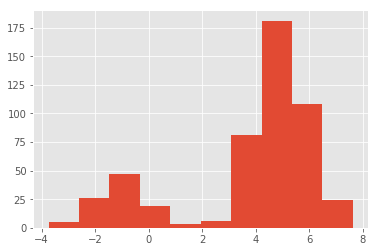

In [60]:
# Generate binomial data
N = 1000
x_1000_bi = np.concatenate((np.random.normal(-1, 1, int(0.1 * N)), np.random.normal(5, 1, int(0.4 * N))))[:, np.newaxis]
plt.hist(x_1000_bi);

### Plot the CDFs for x_1000_bimodal and x_1000 and comment on the output 

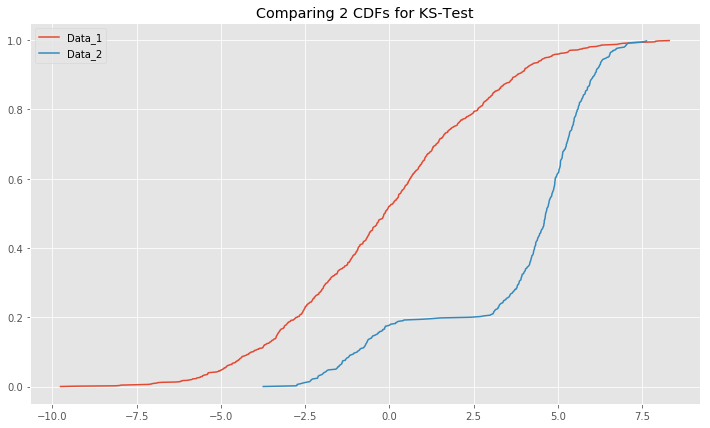

In [63]:
from sklearn import preprocessing
# Plot the CDFs
def ks_plot_2sample(data_1, data_2):
    '''
    Data entereted must be the same size.
    '''
    length = len(data_1)
    plt.figure(figsize=(12, 7))
    plt.plot(np.sort(data_1), np.linspace(0, 1, len(data_1), endpoint=False))
    plt.plot(np.sort(data_2), np.linspace(0, 1, len(data_2), endpoint=False))
    plt.legend('top right')
    plt.legend(['Data_1', 'Data_2'])
    plt.title('Comparing 2 CDFs for KS-Test')
    


# Uncomment below to run
ks_plot_2sample(x_1000, x_1000_bi[:,0])


In [ ]:
# You comments here 
# Significant divergence between the two distributions.  KS-test will generate high value


### Run the two sample KS test on x_1000 and x_1000_bi and comment on the results

In [67]:
# Your code here

stats.ks_2samp(x_1000, x_1000_bi[:,0])

# Ks_2sampResult(statistic=0.633, pvalue=4.814801487740621e-118)

Ks_2sampResult(statistic=0.637, pvalue=1.5537910591408576e-119)

In [ ]:
# Your comments here 
# Reject the null hypothesis.  The samples belong to difference distributions.



## Summary

In this lesson, we saw how to check for normality (and other distributions) using one sample and two sample ks-tests. You are encouraged to use this test for all the upcoming algorithms and techniques that require a normality assumption. We saw that we can actually make assumptions for different distributions by providing the correct CDF function into Scipy KS test functions. 